Data Source : http://data.worldbank.org/data-catalog/world-development-indicators

References : https://www.safaribooksonline.com/library/view/ipython-notebook-essentials/9781783988341/ch04s04.html

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [46]:
wdi = pd.read_csv('WDI_Data.csv')

In [10]:
wdi.loc[:5]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.342225,NaN,86.270751,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,71.969903,NaN,73.909833,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93.828463,NaN,95.151407,NaN,NaN,NaN
5,Arab World,ARB,Access to non-solid fuel (% of population),EG.NSF.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,86.003666,NaN,86.585206,NaN,NaN,NaN


<b>To see how many countries are represented, run the following command line:</b>

In [23]:
countries = wdi.loc[:,'Country Name'].unique()

In [7]:
len(countries)

248

<b>There are more than 1300 different economic indicators in the file. This can be verified by running the following command line:</b>

In [24]:
indicators = wdi.loc[:,'Indicator Code'].unique()

In [25]:
len(indicators)

1345

To show the different kinds of computation one might be interested in performing, let's consider a single country, for example, Brazil. Let's also suppose that we are only interested on the Gross Domestic Product (GDP) information. Now, we'll see how to select the data we are interested in from the table. To make the example simpler, we will perform the selection in two steps. First, we select all rows for the country name Brazil, using the following command line:

In [26]:
wdi_br = wdi.loc[wdi.loc[:,'Country Name']=='Brazil',:]

In [27]:
select_fcn = lambda string: string.upper().find('GDP') >= 0

In [28]:
criterion = wdi_br.loc[:,'Indicator Code'].map(select_fcn)

In [29]:
wdi_br_gdp = wdi_br.loc[criterion,:]

In [30]:
len(wdi_br_gdp)

32

This means that there are 32 GDP-related indicators for the country named Brazil.

In [31]:
wdi_br_gdp.loc[:,['Indicator Code', 'Indicator Name']]

,Indicator Code,Indicator Name
80904,NY.GDP.COAL.RT.ZS,Coal rents (% of GDP)
81009,NY.GDP.DISC.KN,Discrepancy in expenditure estimate of GDP (co...
81010,NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (cu...
81137,NY.GDP.FRST.RT.ZS,Forest rents (% of GDP)
81141,NY.GDP.MKTP.KN,GDP (constant LCU)
81142,NY.GDP.MKTP.CN,GDP (current LCU)
81143,NY.GDP.MKTP.KD,GDP at market prices (constant 2005 US$)
81144,NY.GDP.MKTP.CD,GDP at market prices (current US$)
81145,NY.GDP.DEFL.ZS,GDP deflator (base year varies by country)
81146,NY.GDP.MKTP.KD.ZG,GDP growth (annual %)


The indicator and corresponding names for Brazil 

<b>we are interested only in four indicators: the GDP, annual GDP growth, GDP per capita, and GDP per capita growth. We can further trim the data with the following command</b>

In [32]:
wdi_br_gdp.loc[[81146, 81150, 81151], :]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
81146,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,10.275912,5.216059,0.874673,3.485582,3.053488,...,3.999324,6.005802,5.019316,-0.235978,7.572067,3.916382,1.762489,2.743697,0.144707,NaN
81150,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,209.198785,203.955154,258.757669,290.058284,259.466969,259.004152,...,5809.189096,7240.923983,8700.455202,8462.508346,11124.245780,13042.421933,11922.513058,11711.004405,11384.415010,NaN
81151,Brazil,BRA,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,7.008823,2.072647,-2.125958,0.468618,0.140286,...,2.789168,4.858626,3.948915,-1.215658,6.536010,2.929975,0.815260,1.809216,-0.739013,NaN


We want the indexes of our table to be the years. We also want to have one column for each economic indicator and want to use the economic indicator names (not the codes) as the labels of the columns.  To define DataFrame, pd is added. See also : http://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it

In [33]:
idx = wdi_br_gdp.loc[:,'1965':].columns
cols = wdi_br_gdp.loc[:,'Indicator Name']
data = wdi_br_gdp.loc[:,'1965':].as_matrix()
wdi_br_gdp = pd.DataFrame(data.transpose(), columns=cols, index=idx)

Save the subset of data to CSV file

<b>Saving to a CSV</b>

<p>It's slow and unnecessary to download the data every time, so let's save our dataframe for later use!</p>


In [12]:
wdi_br_gdp.to_csv('wdi_br_gdp.csv')

In [22]:
wdi_br_gdp.to_csv('WDI_Brazil_GDP.csv')

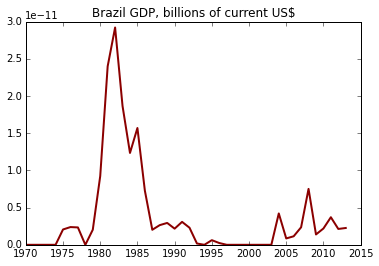

In [34]:
pdata = wdi_br_gdp.ix['1970':, 0] / 1E9
pdata.plot(color='DarkRed', lw=2, 
           title='Brazil GDP, billions of current US$')

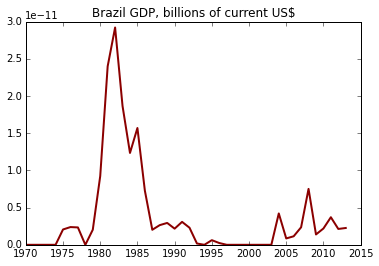

In [35]:
pdata = wdi_br_gdp.ix['1970':, 0] / 1E9
pdata.plot(color='DarkRed', lw=2, 
           title='Brazil GDP, billions of current US$')

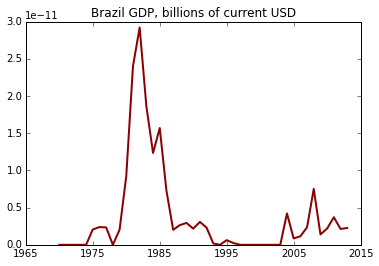

In [16]:
pdata = wdi_br_gdp.ix['1965':, 0] / 1E9
pdata.plot(color='DarkRed', lw=2, 
           title='Brazil GDP, billions of current USD')

In [49]:
bric_countries = ['Brazil', 'China', 'India', 'Russian Federation']
gdp_code = 'NY.GDP.PCAP.KD.ZG'
selection_fct = lambda s: s in bric_countries
criterion = wdi.loc[:,'Country Name'].map(selection_fct)
wdi_bric = wdi.loc[criterion & (wdi.loc[:,'Indicator Code'] == gdp_code),:]

In [58]:
df_temp = wdi_bric.loc[:, '2000':'2010']
idx = df_temp.columns
cols = wdi_bric.loc[:, 'Country Name']
data = df_temp.as_matrix()
bric_gdp = pd.DataFrame(data.transpose(), columns=cols, index=idx)

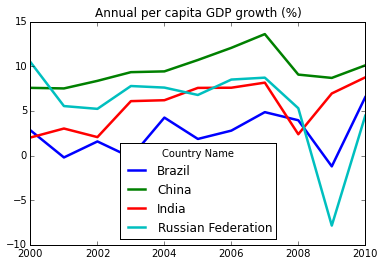

In [59]:
bric_gdp.plot(lw=2.5,
              title='Annual per capita GDP growth (%)')

Environment set-up 

In [1]:
% env

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\mryapss\\AppData\\Roaming',
 'CLICOLOR': '1',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'MRYAP',
 'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
 'FP_NO_HOST_CHECK': 'NO',
 'GIT_PAGER': 'cat',
 'HOMEDRIVE': 'C:',
 'HOMEPATH': '\\Users\\mryapss',
 'IPY_INTERRUPT_EVENT': '1756',
 'JPY_INTERRUPT_EVENT': '1756',
 'JPY_PARENT_PID': '1712',
 'LOCALAPPDATA': 'C:\\Users\\mryapss\\AppData\\Local',
 'LOGONSERVER': '\\\\MRYAP',
 'NUMBER_OF_PROCESSORS': '4',
 'OS': 'Windows_NT',
 'PAGER': 'cat',
 'PATH': 'C:\\ProgramData\\Oracle\\Java\\javapath;C:\\Python27\\;C:\\Python27\\Scripts;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Program Files (x86)\\ATI Technologies\\ATI.ACE\\Core-Static;C:\\Users\\mryapss\\Anaconda